# Synthetic Data Test

In [104]:
from mvlearn.embed.kcca import KCCA
from mvlearn.embed.dcca import DCCA
from mvlearn.embed.gcca import GCCA

from mvlearn.datasets.GaussianMixture import GaussianMixture
%load_ext autoreload
%autoreload 2

import numpy as np
import collections
import matplotlib.pyplot as plt
from graspy.plot import pairplot
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialize Latent Data

In [67]:
## Training
n = 100
mu = [[0,5], [0,-5]]
sigma = [10*np.eye(2), 10*np.eye(2)]
seed = 1
pi = [0.5,0.5]
GM = GaussianMixture(n,seed,mu,sigma,class_probs=pi)

## Test
seed = 2
GM2 = GaussianMixture(n,seed,mu,sigma,class_probs=pi)

## Point Distribution

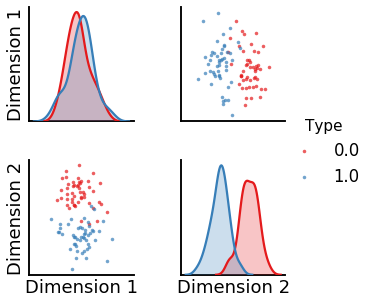

In [68]:
pairplot(GM.latent, GM.y)

## Latent Plotted against itself (ground truth)

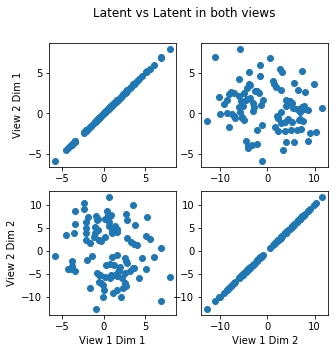

In [71]:
GM.plot_latents(title='Latent vs Latent in both views')

In [109]:
def plot_components(components, method, transformation):
    # We plot dimensions of both views to further show that the first two dimensions are linearly correlated ideally
    n_dim = components[0].shape[1]
    fig,axes = plt.subplots(n_dim,n_dim,figsize=(8,8))
    for i,ax in enumerate(axes.flatten()):
        dim2 = int(i/n_dim)
        dim1 = i % n_dim
        ax.scatter(components[0][:,dim1],components[1][:,dim2])
        #ax.set_title('Dimension 1')
        if dim2 == n_dim-1:
            ax.set_xlabel(f'View 1 Component {dim1+1}')
        if dim1 == 0:
            ax.set_ylabel(f'View 2 Component {dim2+1}')
        ax.set_xticks([])

    plt.suptitle(f'{method} o {transformation} Transform')
    plt.show()

def compare_methods(transform, n_noise=2):
    # Create train/test 2 views
    GM.sample_views(transform=transform, n_noise=n_noise, seeds=[1,2])
    GM2.sample_views(transform=transform, n_noise=n_noise, seeds=[5,6])
    
    # Plot 2 views of training data
    GM.plot_2views(title=f'{transform} Transformation of Latents', figsize=(8,8))

    # KCCA Methods
    ktypes = ['linear', 'poly', 'gaussian']
    for ktype in ktypes:
        kcca = KCCA(ktype=ktype, reg = 0.1, n_components = GM.Xs[0].shape[1])
        kcca = kcca.fit(GM.Xs).transform(GM2.Xs)
        plot_components(kcca.components_, ktype + ' KCCA', transform)    
        
    # DCCA
    input_size1, input_size2 = GM.Xs[0].shape[1], GM.Xs[1].shape[1]
    outdim_size = min(GM.Xs[0].shape[1], GM.Xs[1].shape[1])
    layer_sizes1 = [1024, outdim_size]
    layer_sizes2 = [1024, outdim_size]
    dcca = DCCA(input_size1, input_size2, outdim_size, layer_sizes1, layer_sizes2)
    dcca = dcca.fit(GM.Xs)
    outputs = dcca.transform(GM2.Xs)
    plot_components(outputs, 'Deep CCA', transform)  

## Linear Transformation

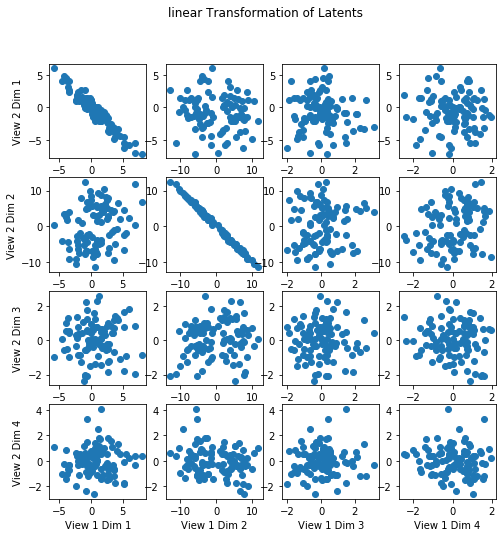

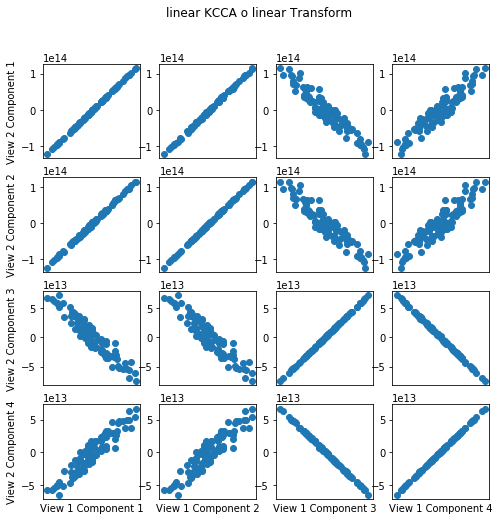

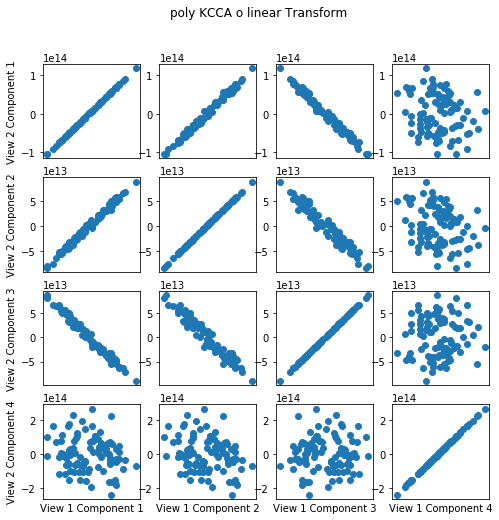

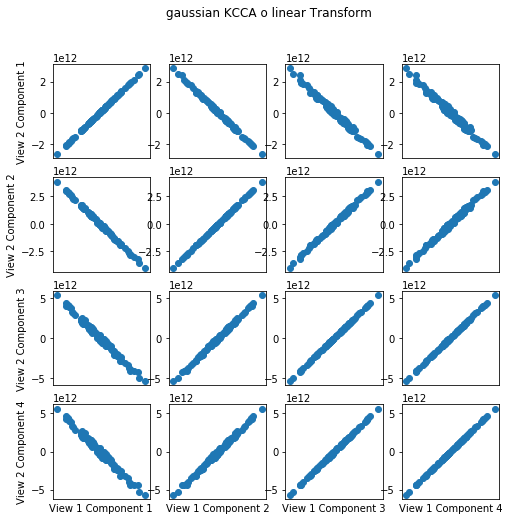

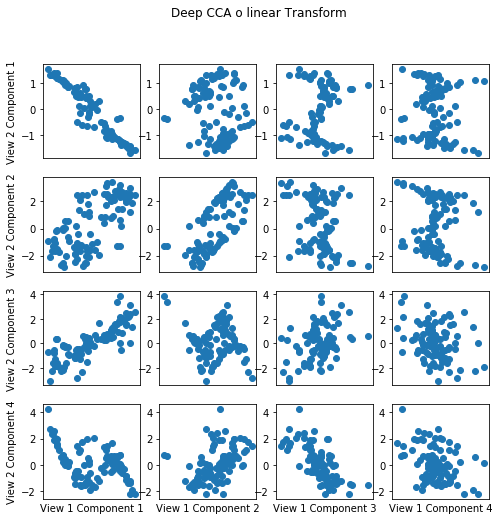

In [110]:
compare_methods('linear')

## Polynomial Transformation

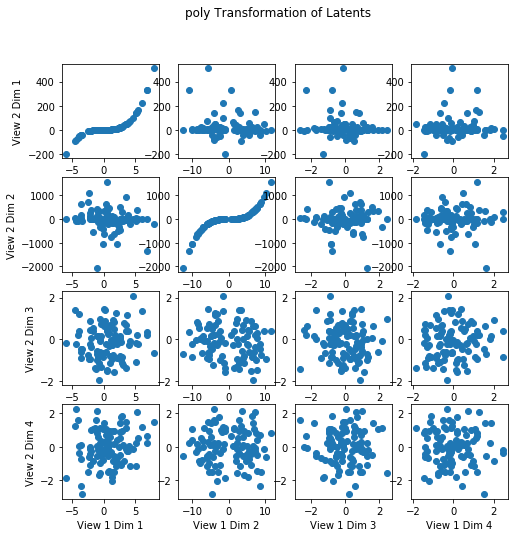

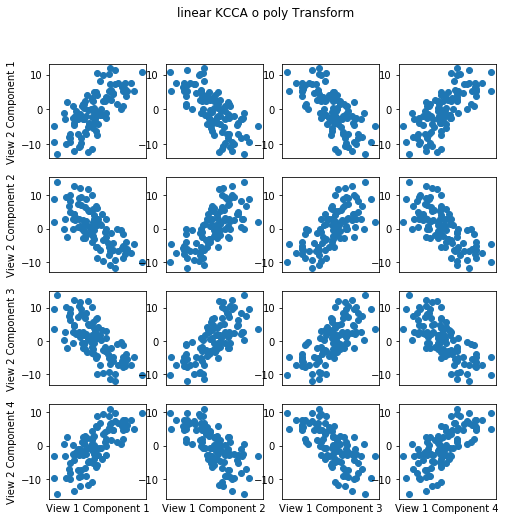

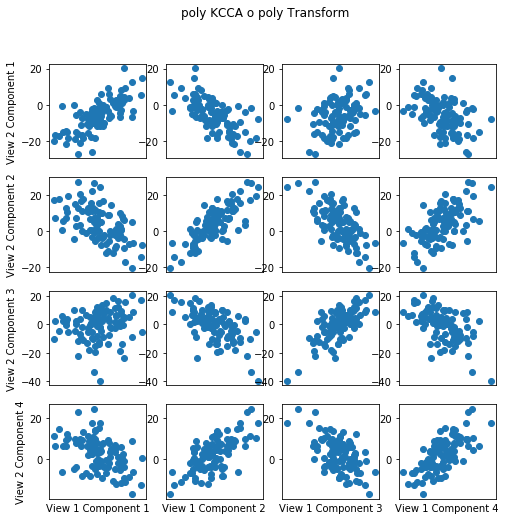

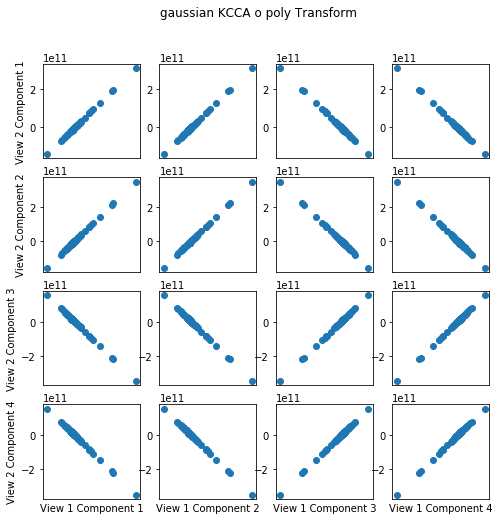

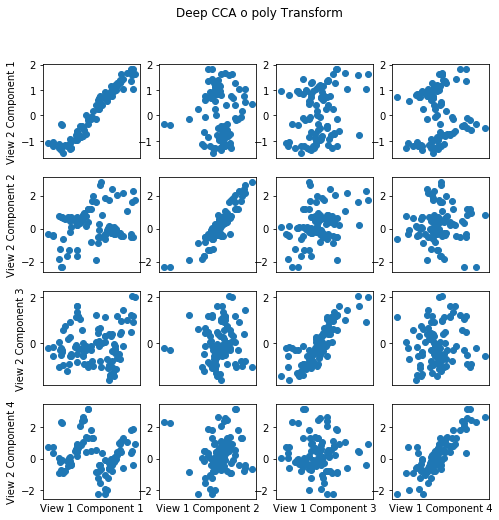

In [111]:
compare_methods('poly')

## Inverse Polynomial Transformation

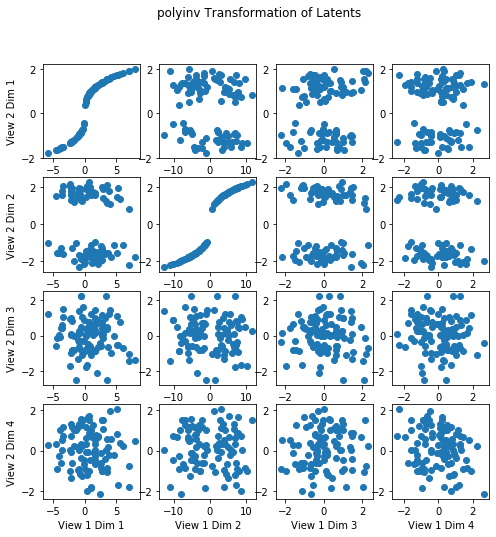

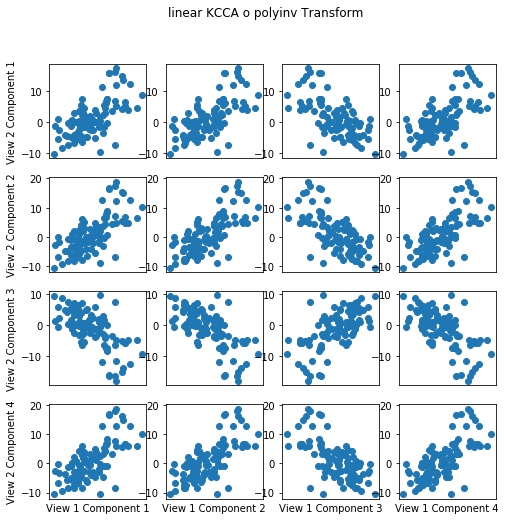

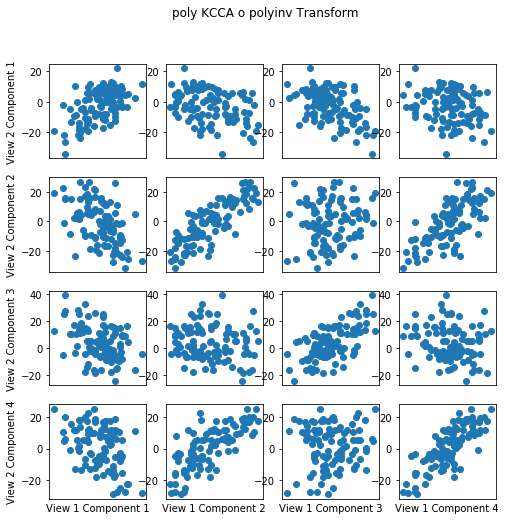

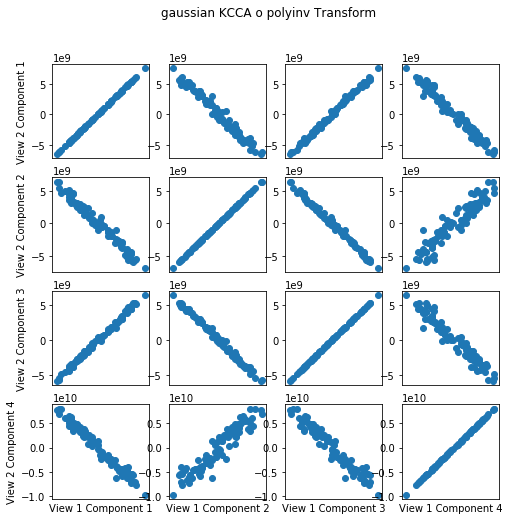

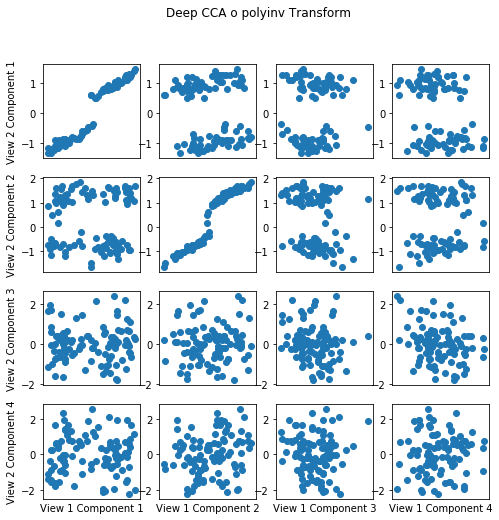

In [112]:
compare_methods('polyinv')

## Sin Transformation

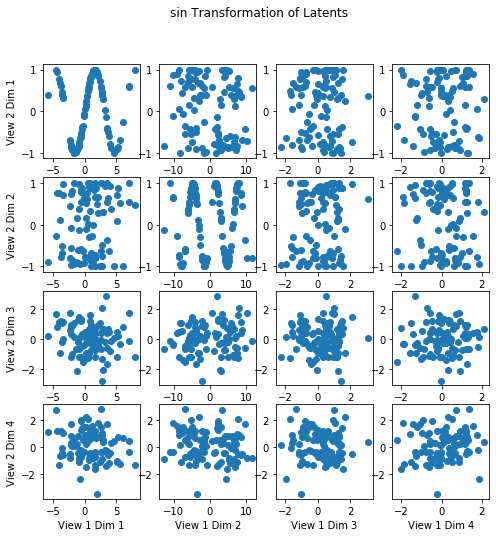

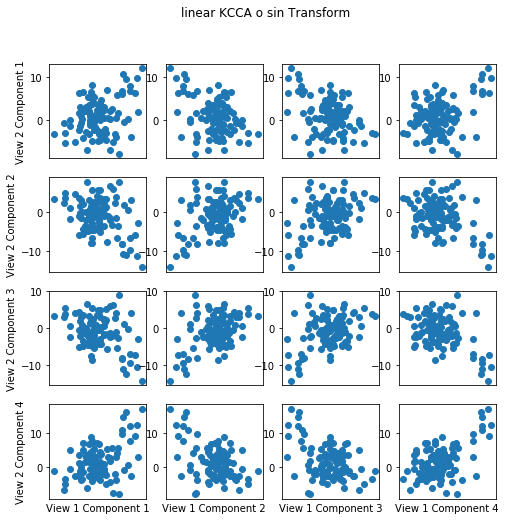

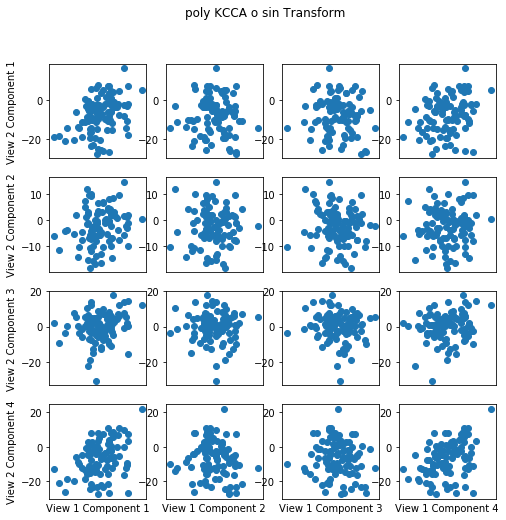

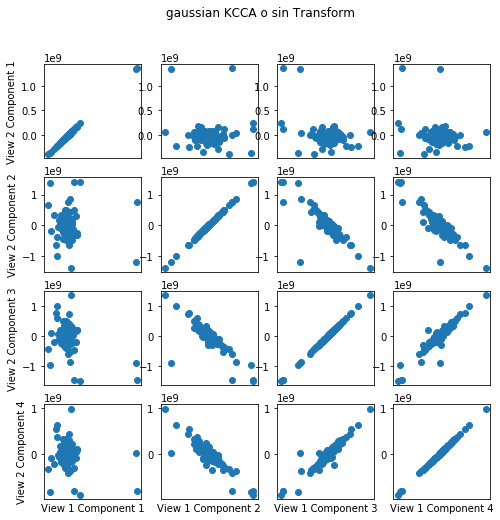

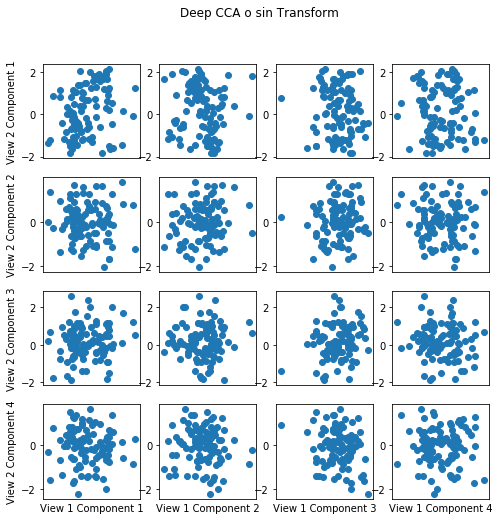

In [113]:
compare_methods('sin')